In [1]:
# Car Model Prediction

In [1]:
from src.SVM import SVM
from src.Softmax import Softmax
from src.vector_generator import CarPredictor
from src.utils import show_images, get_acc
from src.reader import TrainSet, TestSet

import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'\n{device} will be used as device')
print(torch.cuda.get_device_name(0))


cuda:0 will be used as device
NVIDIA GeForce RTX 2070 with Max-Q Design


In [2]:
# Load and display images

root = 'data/data'
scale_size = 224
batch_size = 128

transform = transforms.Compose([
   transforms.Resize((scale_size, scale_size)),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225],
                        inplace=True)
])

train_data = TrainSet(root=root, device=device, transform=transform)
test_data = TestSet(root=root, device=device, transform=transform)

In [3]:
# Retrieve test and train dataframes
# Warning: Very time consuming

griddim = 1, 2
blockdim = 3, 4

cp = CarPredictor(device)
train_df = cp.get_train_df(train_data)
test_df = cp.get_test_df(test_data)

dex: 3641
Copying at index: 3642
Copying at index: 3643
Copying at index: 3644
Copying at index: 3645
Copying at index: 3646
Copying at index: 3647
Copying at index: 3648
Copying at index: 3649
Copying at index: 3650
Copying at index: 3651
Copying at index: 3652
Copying at index: 3653
Copying at index: 3654
Copying at index: 3655
Copying at index: 3656
Copying at index: 3657
Copying at index: 3658
Copying at index: 3659
Copying at index: 3660
Copying at index: 3661
Copying at index: 3662
Copying at index: 3663
Copying at index: 3664
Copying at index: 3665
Copying at index: 3666
Copying at index: 3667
Copying at index: 3668
Copying at index: 3669
Copying at index: 3670
Copying at index: 3671
Copying at index: 3672
Copying at index: 3673
Copying at index: 3674
Copying at index: 3675
Copying at index: 3676
Copying at index: 3677
Copying at index: 3678
Copying at index: 3679
Copying at index: 3680
Copying at index: 3681
Copying at index: 3682
Copying at index: 3683
Copying at index: 3684
C

In [6]:
print(train_df[0][101])

data/data/image/78/12/2012/722894351630dc.jpg


In [3]:
# save cleaned up data to disk
import numpy as np
np.save('research_data_train', train_df)
np.save('research_data_train_labels', train_df.columns)
np.save('research_data_test', test_df) 
np.save('research_data_test_labels', test_df.columns)

In [27]:
# Split out validation set
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# load from disk
train_df = pd.DataFrame(
    data=np.load('research_data_train.npy', allow_pickle=True),
    columns=np.load('research_data_train_labels.npy', allow_pickle=True))

test_df = pd.DataFrame(
    data=np.load('research_data_test.npy', allow_pickle=True),
    columns=np.load('research_data_test_labels.npy', allow_pickle=True))

y_train = train_df['Match'].astype(int)
x_train = train_df.drop('Match', axis=1).drop('label1', axis=1).drop('label2', axis=1)


x, xTest, y, yTest = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.20, random_state=42)


xTrain = xTrain.to_numpy()
xVal = xVal.to_numpy()
xTest = xTest.to_numpy()

yTrain = yTrain.to_numpy()
yVal = yVal.to_numpy()
yTest = yTest.to_numpy()

y_test = test_df['Match'].astype(int).to_numpy()
x_test = test_df.drop('Match', axis=1).astype(float).to_numpy()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

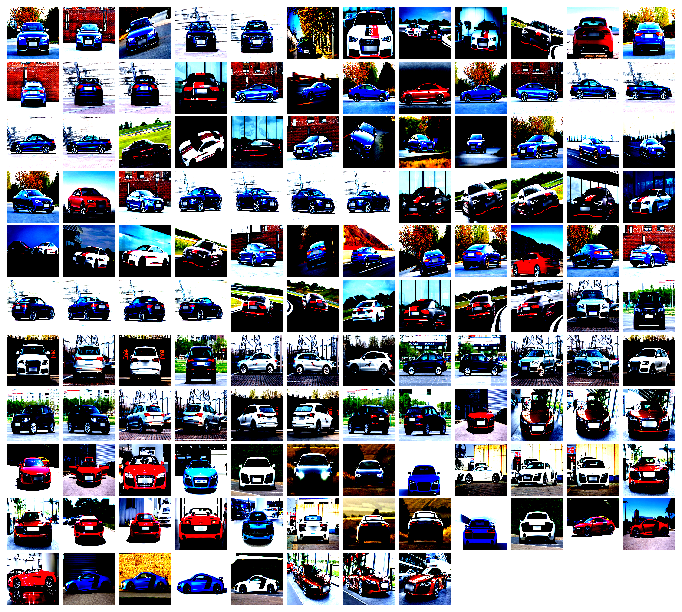

In [7]:
# Visualize some images

imgs = []
for i in range(batch_size):
    imgs.append(train_data[i][1].numpy())

show_images(np.array(imgs), color=True)

In [3]:
learning_rate = 0.01
epochs = 50
n_class = 2
rc = 0.01

svm_model = SVM(n_class, learning_rate, epochs, rc).to(device)

# train
svm_losses = svm_model(xTrain, yTrain)

predTrain = svm_model.predict(xTrain)
accTrain = get_acc(predTrain, yTrain)

# validate
predValidation = svm_model.predict(xVal)
accValidation = get_acc(predValidation, yVal)

print('SVM Training Accuracy : %f | Validation Accuracy: %f' % (accTrain, accValidation))
print(f'Training set size: {xTrain.shape} | Validation set size: {xVal.shape}')

SVM Training Accuracy : 55.893382 | Validation Accuracy: 56.455159
Training set size: (152807, 200) | Validation set size: (38202, 200)


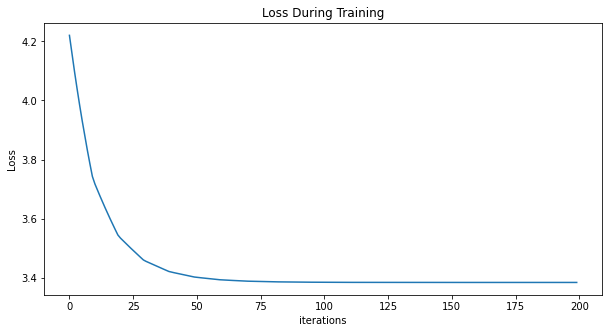

In [8]:
# plot error

plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(svm_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

In [18]:
# Original test set
predTest = svm_model.predict(x_test)
accTest = get_acc(predTest, y_test)

print('Part III: SVM Test Accuracy: %f' % (accTest))
print(f'Test set size: {x_test.shape}')

Part III: SVM Test Accuracy: 48.890000
Test set size: (20000, 200)


In [17]:
# New test set
predTest = svm_model.predict(xTest)
accTest = get_acc(predTest, yTest)

print('Part II: SVM Test Accuracy: %f' % (accTest))
print(f'Test set size: {xTest.shape}')

Part II: SVM Test Accuracy: 55.639842
Test set size: (21224, 200)


In [4]:
# Softmax

In [28]:
learning_rate = 0.01
epochs = 50
n_class = 2
rc = 0.001

sx_model = Softmax(n_class, learning_rate, epochs, rc).to(device)

# train
sx_losses = sx_model(xTrain, yTrain)

predTrain_sx = sx_model.predict(xTrain)
accTrain_sx = get_acc(predTrain_sx, yTrain)

# validate
predValidation_sx = sx_model.predict(xVal)
accValidation_sx = get_acc(predValidation_sx, yVal)

print('Sotfmax Training Accuracy : %f | Validation Accuracy: %f' % (accTrain_sx, accValidation_sx))

Sotfmax Training Accuracy : 65.111546 | Validation Accuracy: 65.452071


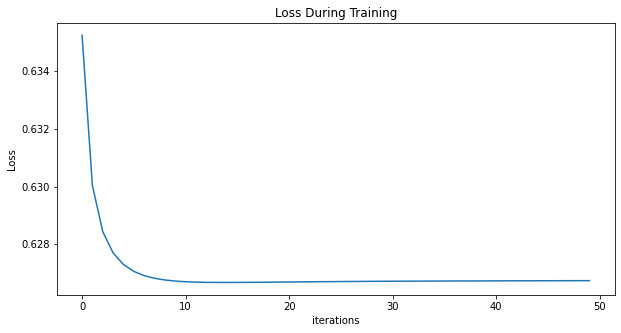

In [20]:
# plot error
plt.figure(figsize=(10,5))
plt.title("Loss During Training")
plt.plot(sx_losses)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

In [29]:
# Original test set
predTest_sx = sx_model.predict(x_test)
accTest_sx = get_acc(predTest_sx, y_test)

print('Part III: Softmax Test Accuracy: %f' % (accTest_sx))


Part III: Softmax Test Accuracy: 47.660000


In [30]:
# New test set
predTest_sx = sx_model.predict(xTest)
accTest_sx = get_acc(predTest_sx, yTest)

print('Part II: Softmax Test Accuracy: %f' % (accTest_sx))

Part II: Softmax Test Accuracy: 64.780437


In [23]:
# Split out validation set
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# load from disk
train_df = pd.DataFrame(
    data=np.load('research_data_train_pt.npy', allow_pickle=True),
    columns=np.load('research_data_train_labels_pt.npy', allow_pickle=True))

test_df = pd.DataFrame(
    data=np.load('research_data_test_pt.npy', allow_pickle=True),
    columns=np.load('research_data_test_labels_pt.npy', allow_pickle=True))

y_train = train_df['Match'].astype(int)
x_train = train_df.drop('Match', axis=1).drop('label1', axis=1).drop('label2', axis=1).drop('path1', axis=1).drop('path2', axis=1)

xTrainPath = x_train['Path'].to_numpy()

xTrain = x_train.drop('Path', axis=1).to_numpy()
yTrain = y_train.to_numpy()

x_test_path = test_df['Path'].to_numpy()
y_test = test_df['Match'].astype(int).to_numpy()
x_test = test_df.drop('Match', axis=1).drop('Path', axis=1).astype(float).to_numpy()

In [24]:
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

def show_prediction_images(
        expected: np.ndarray,
        actual: np.ndarray,
        images: np.ndarray,
        name: str,
        wrong: bool = True) -> None:
    """
        Displays pairs of images predicted as equal or not
    """

    itr = 0

    size = 5

    img_vectors = []

    for i in range(expected.shape[0]):
        same = expected[i] == actual[i]

        if wrong and not same and itr < size:
            paths = images[i].split('||')
            img_vectors.append(mpimg.imread(paths[0]))
            img_vectors.append(mpimg.imread(paths[1]))
            itr += 1

        if not wrong and same and itr < size:
            paths = images[i].split('||')
            img_vectors.append(mpimg.imread(paths[0]))
            img_vectors.append(mpimg.imread(paths[1]))
            itr += 1

        if itr == size:
            break

    img_vectors = np.array(img_vectors)
    sqrtn = int(np.ceil(np.sqrt(img_vectors.shape[0])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(size, 2)
    gs.update(wspace=0.05, hspace=0.05)

    for i in range(len(img_vectors)):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')

        # print(img_vectors[i].shape)
        plt.imshow(img_vectors[i])
    
    figure = "{0}.png".format(name)
    plt.savefig(figure, bbox_inches='tight', dpi=600)

<ipython-input-24-9aaad8ec5e14>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_vectors = np.array(img_vectors)


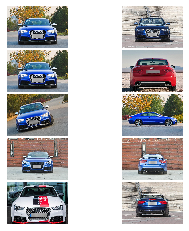

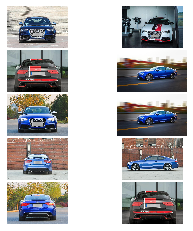

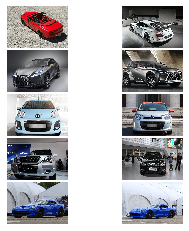

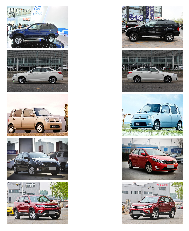

In [25]:

train_sx = svm_model.predict(xTrain)
show_prediction_images(yTrain, train_sx, xTrainPath, 'part2_wrong_sm')
show_prediction_images(yTrain, train_sx, xTrainPath, 'part2_right_sm', wrong=False)


test_sx = svm_model.predict(x_test)
show_prediction_images(y_test, test_sx, x_test_path, 'part3_wrong_sm')
show_prediction_images(y_test, test_sx, x_test_path, 'part3_right_sm', wrong=False)
